# **Makeup Shades Analysis**

## **Introduction**  
The cosmetics industry thrives on the ability to deliver products that resonate with customer preferences. Analyzing makeup shades and their properties is essential for brands to understand trends, improve product offerings, and cater to diverse markets. This project explores a dataset of makeup shades, focusing on their color properties represented in HSV (Hue, Saturation, Value) and HEX codes, as well as their grouping and classification.

## **Problem Statement**  
The dataset contains missing values and unstructured information, which hinders a smooth analysis of the makeup shades. Without proper cleaning and exploration, identifying patterns and insights, such as how shades align across product groups and brands, becomes challenging. Furthermore, the lack of a clear understanding of color properties may limit the dataset's utility for further applications in product development or marketing strategies.

## **Objective**  
This notebook aims to:
1. **Clean the Dataset**: Handle missing values and ensure a structured dataset ready for analysis.
2. **Analyze Color Properties**: Explore the distribution and relationships of color attributes (HSV and HEX).
3. **Provide Insights**: Uncover trends and patterns in makeup shades across brands and product groups to support data-driven decision-making in the cosmetics industry.


# **1. Data Cleaning and Preprocessing of Makeup Dataset**

In this section, we perform data cleaning and preprocessing tasks on the makeup dataset. The main steps include identifying missing values, imputing them, and verifying the process.


**1.1 Importing necessary libraries**

Mmport pandas as pd

**1.2 Loading Dataset**

Next, we load the dataset from a CSV file into a pandas DataFrame. Be sure to update the file path to match the location of your dataset.

**1.3 Identifying Missing Values**

Before we begin cleaning the dataset, it's crucial to check for missing values. The following code checks for any missing values in the dataset.

**1.4 Imputing Missing Values**

In this step, we handle the missing values in the numerical columns (H, S, and V) by imputing the mean of each respective column.

**1.5 Verifying the Cleaning Process**

After imputing the missing values, we verify that the missing values have been handled correctly by checking again for any missing data.


In [14]:
# Import necessary libraries
import pandas as pd

# Load the dataset
makeup_data = pd.read_csv('shades.csv')  # Ensure the correct path to the dataset

# Display the first few rows of the dataset
print("Initial Dataset:")
display(makeup_data.head())

# Step 1: Identify missing values
print("\nMissing Values Summary (Before Cleaning):")
missing_values_summary = makeup_data.isnull().sum()
print(missing_values_summary)

# Step 2: Impute missing values with column means for numerical columns
columns_to_impute = ['H', 'S', 'V']
makeup_data[columns_to_impute] = makeup_data[columns_to_impute].fillna(makeup_data[columns_to_impute].mean())

# Step 3: Verify the cleaning process
print("\nMissing Values Summary (After Cleaning):")
cleaned_data_missing_summary = makeup_data.isnull().sum()
print(cleaned_data_missing_summary)



Initial Dataset:


,brand,brand_short,product,product_short,hex,H,S,V,L,group
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2



Missing Values Summary (Before Cleaning):
brand             0
brand_short       0
product           0
product_short     0
hex               0
H                12
S                12
V                12
L                 0
group             0
dtype: int64

Missing Values Summary (After Cleaning):
brand            0
brand_short      0
product          0
product_short    0
hex              0
H                0
S                0
V                0
L                0
group            0
dtype: int64


**1.5 Displaying Column Names**

This step helps to ensure that the dataset contains the expected columns, and it can be useful for verifying the presence of the columns before performing further data manipulation tasks.

In [15]:
# Display the column names to verify their existence
print("Columns in the dataset:")
print(makeup_data.columns)


Columns in the dataset:
Index(['brand', 'brand_short', 'product', 'product_short', 'hex', 'H', 'S',
       'V', 'L', 'group'],
      dtype='object')


**1.5 Dropping Irrelevant Column Names**

Dropping Columns: The drop(columns=[...]) method is used to remove specific columns from the dataset. In this case, we are removing the brand_short and product_short columns.

Confirmation: After dropping the columns, we use display(makeup_data.head()) to display the first few rows and confirm that the columns have been successfully removed.

In [16]:
# Drop the 'brand_short' and 'product_short' columns
makeup_data = makeup_data.drop(columns=['brand_short', 'product_short'])

# Display the first few rows to confirm the columns were dropped
print("Dataset after dropping 'brand_short' and 'product_short' columns:")
display(makeup_data.head())


Dataset after dropping 'brand_short' and 'product_short' columns:


,brand,product,hex,H,S,V,L,group
0,Maybelline,Fit Me,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,Fit Me,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,Fit Me,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,Fit Me,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,Fit Me,bd9584,18.0,0.30,0.74,65,2


**8. Saving the Cleaned Dataset**

After performing the necessary cleaning and preprocessing steps, we save the cleaned dataset to a CSV file for further use.

```python
# Save the cleaned dataset
cleaned_file_path = r'C:\Users\silin\Downloads\Makeup.Popularity\cleaned_shades.csv'  # Updated path
makeup_data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}")


In [17]:
# Save the cleaned dataset
cleaned_file_path = r'C:\Users\silin\Downloads\Makeup.Popularity\cleaned_shades.csv'  # Updated path
makeup_data.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to {cleaned_file_path}")



Cleaned dataset saved to C:\Users\silin\Downloads\Makeup.Popularity\cleaned_shades.csv


## **2. Exploratory Data Analysis**

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          625 non-null    object 
 1   brand_short    625 non-null    object 
 2   product        625 non-null    object 
 3   product_short  625 non-null    object 
 4   hex            625 non-null    object 
 5   H              613 non-null    float64
 6   S              613 non-null    float64
 7   V              613 non-null    float64
 8   L              625 non-null    int64  
 9   group          625 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 49.0+ KB

Sample Data:


,brand,brand_short,product,product_short,hex,H,S,V,L,group
0,Maybelline,mb,Fit Me,fmf,f3cfb3,26.0,0.26,0.95,86,2
1,Maybelline,mb,Fit Me,fmf,ffe3c2,32.0,0.24,1.00,92,2
2,Maybelline,mb,Fit Me,fmf,ffe0cd,23.0,0.20,1.00,91,2
3,Maybelline,mb,Fit Me,fmf,ffd3be,19.0,0.25,1.00,88,2
4,Maybelline,mb,Fit Me,fmf,bd9584,18.0,0.30,0.74,65,2



Missing Values Summary:
brand             0
brand_short       0
product           0
product_short     0
hex               0
H                12
S                12
V                12
L                 0
group             0
dtype: int64

Summary Statistics for Numerical Columns:


,H,S,V,L,group
count,613.000000,613.000000,613.000000,625.000000,625.000000
mean,25.314845,0.459494,0.779543,65.920000,3.472000
std,5.327852,0.154089,0.173955,17.512267,1.976529
min,4.000000,0.100000,0.200000,11.000000,0.000000
25%,23.000000,0.350000,0.690000,55.000000,2.000000
50%,26.000000,0.440000,0.840000,71.000000,3.000000
75%,29.000000,0.560000,0.910000,79.000000,5.000000
max,45.000000,1.000000,1.000000,95.000000,7.000000



Unique Values in Categorical Columns:
brand: 36 unique values
brand_short: 36 unique values
product: 38 unique values
product_short: 37 unique values
hex: 617 unique values


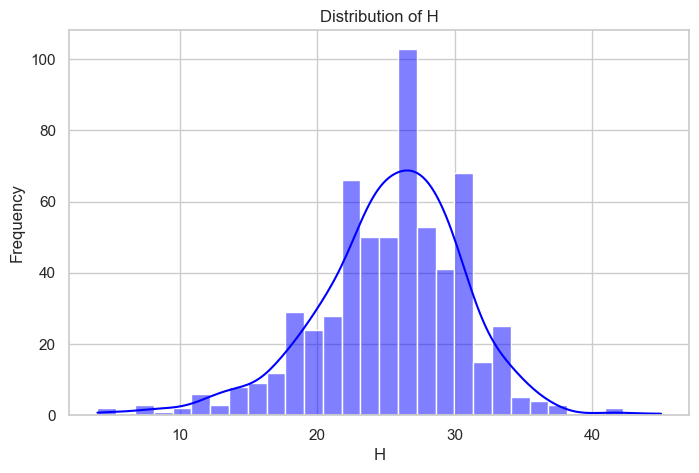

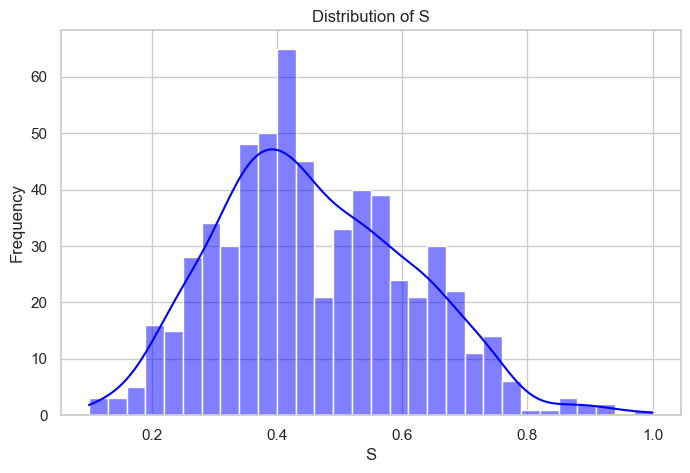

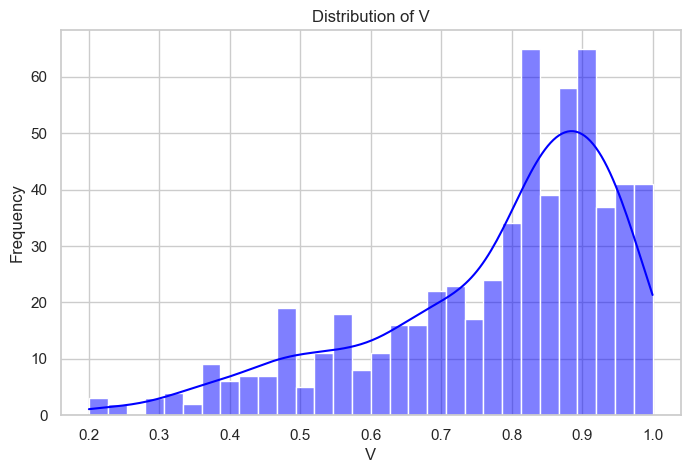

C:\Users\silin\AppData\Local\Temp\ipykernel_18288\1477122704.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_brands.values, y=popular_brands.index, palette='viridis')


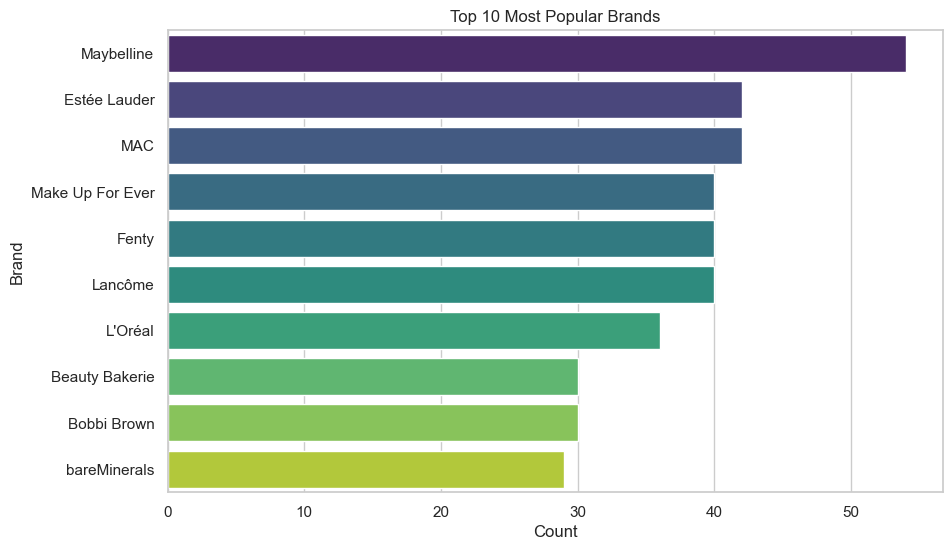

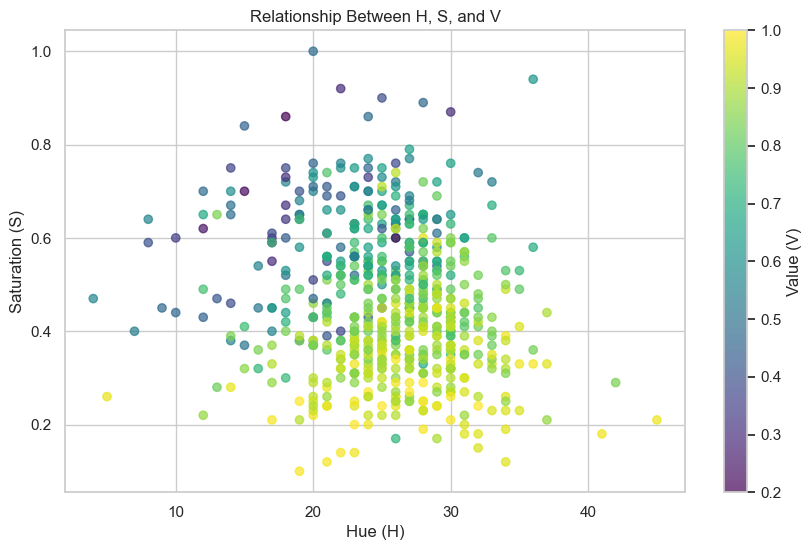

C:\Users\silin\AppData\Local\Temp\ipykernel_18288\1477122704.py:90: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=makeup_data, x='brand', y='H', palette='Set3')


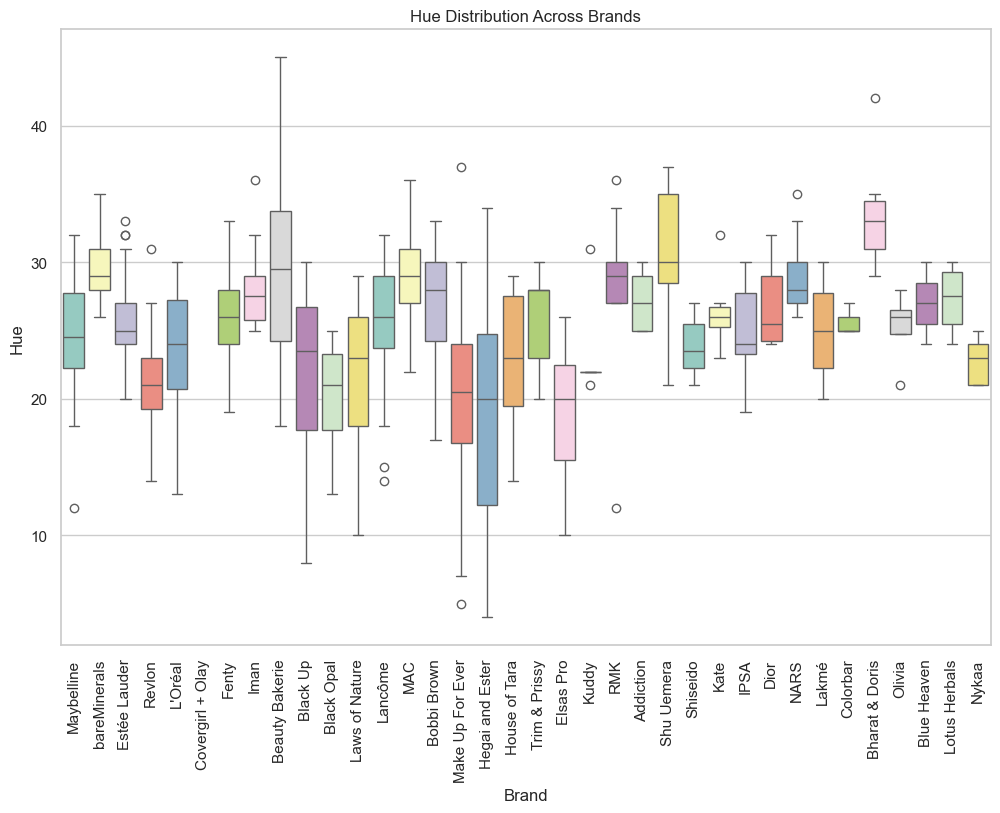


Top 5 Most Popular Shades (H, S, V):


,H,S,V,count
388,28.0,0.23,0.94,2
433,28.0,0.65,0.72,2
539,31.0,0.60,0.67,2
355,27.0,0.43,0.86,2
499,30.0,0.41,0.92,2



Brands with the Most Shade Variety:


brand
Make Up For Ever    19
Lancôme             16
Beauty Bakerie      16
Maybelline          16
Bobbi Brown         15
Name: H, dtype: int64


Popular shades insights saved to C:\Users\silin\Downloads\Makeup.Popularity\popular_shades_insights.csv


In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = r'C:\Users\silin\Downloads\Makeup.Popularity\cleaned_shades.csv'
makeup_data = pd.read_csv('shades.csv')

# --------------------------
# 1. Dataset Overview
# --------------------------

# Display dataset information
print("Dataset Information:")
makeup_data.info()

# Display the first few rows of the dataset
print("\nSample Data:")
display(makeup_data.head())

# Check for missing values
print("\nMissing Values Summary:")
print(makeup_data.isnull().sum())

# Display basic statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
display(makeup_data.describe())

# Display unique value counts for categorical columns
print("\nUnique Values in Categorical Columns:")
for column in makeup_data.select_dtypes(include='object').columns:
    print(f"{column}: {makeup_data[column].nunique()} unique values")

# --------------------------
# 2. Data Visualization
# --------------------------

# Set visual styles
sns.set_theme(style="whitegrid")

# Numerical columns for visualization
numerical_columns = ['H', 'S', 'V']

# 2.1 Distribution of Numerical Features
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(makeup_data[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# 2.2 Popular Brands
plt.figure(figsize=(10, 6))
popular_brands = makeup_data['brand'].value_counts().head(10)  # Top 10 brands
sns.barplot(x=popular_brands.values, y=popular_brands.index, palette='viridis')
plt.title("Top 10 Most Popular Brands")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()

# 2.3 Relationship Between H, S, and V (with color bar for V)
plt.figure(figsize=(10, 6))

# Create a scatter plot with colormap
scatter = plt.scatter(
    makeup_data['H'], 
    makeup_data['S'], 
    c=makeup_data['V'], 
    cmap='viridis', 
    alpha=0.7
)

# Add title and labels
plt.title("Relationship Between H, S, and V")
plt.xlabel("Hue (H)")
plt.ylabel("Saturation (S)")

# Add colorbar for the 'V' values
cbar = plt.colorbar(scatter)
cbar.set_label("Value (V)")

# Show plot
plt.show()


# 2.4 Shade Characteristics by Brand
plt.figure(figsize=(12, 8))
sns.boxplot(data=makeup_data, x='brand', y='H', palette='Set3')
plt.title("Hue Distribution Across Brands")
plt.xlabel("Brand")
plt.ylabel("Hue")
plt.xticks(rotation=90)
plt.show()

# --------------------------
# 3. Insights Generation
# --------------------------

# 3.1 Most Popular Shade Characteristics
popular_shades = makeup_data.groupby(['H', 'S', 'V']).size().reset_index(name='count')
popular_shades = popular_shades.sort_values('count', ascending=False).head(5)
print("\nTop 5 Most Popular Shades (H, S, V):")
display(popular_shades)

# 3.2 Brands with the Most Shade Variety
brand_shade_variety = makeup_data.groupby('brand')['H'].nunique().sort_values(ascending=False)
print("\nBrands with the Most Shade Variety:")
display(brand_shade_variety.head(5))

# --------------------------
# 4. Save Insights
# --------------------------

# Save insights for popular shades into a CSV
popular_shades_file_path = r'C:\Users\silin\Downloads\Makeup.Popularity\popular_shades_insights.csv'
popular_shades.to_csv(popular_shades_file_path, index=False)
print(f"\nPopular shades insights saved to {popular_shades_file_path}")


## Modeling
In this section, we will build predictive models using the provided dataset.

### Data Preparation
Before building our models, we'll preprocess the dataset to handle missing values, encode categorical features, and split it into training and testing sets.

In [19]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handle missing values (if applicable)
makeup_data.fillna(makeup_data.select_dtypes(include=['number']).mean(), inplace=True)

# Encode categorical variables
categorical_columns = makeup_data.select_dtypes(include=['object']).columns


# Handle missing values (if applicable)
makeup_data.fillna(makeup_data.mean(), inplace=True)

# Encode categorical variables
categorical_columns =makeup_data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    makeup_data[col] = le.fit_transform(makeup_data[col])
    label_encoders[col] = le

# Splitting data into features (X) and target (y)
X = makeup_data.drop(columns=['target_column'])  # Replace 'target_column' with the actual target column name
y = makeup_data['target_column']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

TypeError: Could not convert ["MaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellinebareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsbareMineralsEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderEstée LauderRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonRevlonL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalCovergirl + OlayCovergirl + OlayCovergirl + OlayCovergirl + OlayCovergirl + OlayCovergirl + OlayCovergirl + OlayCovergirl + OlayCovergirl + OlayCovergirl + OlayCovergirl + OlayCovergirl + OlayFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyFentyImanImanImanImanImanImanImanImanBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBeauty BakerieBlack UpBlack UpBlack UpBlack UpBlack UpBlack UpBlack UpBlack UpBlack UpBlack UpBlack UpBlack UpBlack UpBlack UpBlack UpBlack UpBlack UpBlack UpBlack OpalBlack OpalBlack OpalBlack OpalBlack OpalBlack OpalBlack OpalBlack OpalBlack OpalBlack OpalBlack OpalBlack OpalLaws of NatureLaws of NatureLaws of NatureLaws of NatureLaws of NatureLaws of NatureLaws of NatureLaws of NatureLaws of NatureLaws of NatureLaws of NatureLaws of NatureLaws of NatureLaws of NatureLaws of NatureLaws of NatureLaws of NatureLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeLancômeMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACMACBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownBobbi BrownMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverMake Up For EverHegai and EsterHegai and EsterHegai and EsterHegai and EsterHegai and EsterHegai and EsterHegai and EsterHegai and EsterHegai and EsterHegai and EsterHouse of TaraHouse of TaraHouse of TaraHouse of TaraHouse of TaraHouse of TaraHouse of TaraHouse of TaraHouse of TaraHouse of TaraHouse of TaraTrim & PrissyTrim & PrissyTrim & PrissyTrim & PrissyTrim & PrissyTrim & PrissyTrim & PrissyTrim & PrissyTrim & PrissyTrim & PrissyTrim & PrissyTrim & PrissyTrim & PrissyElsas ProElsas ProElsas ProElsas ProElsas ProElsas ProElsas ProElsas ProElsas ProElsas ProElsas ProKuddyKuddyKuddyKuddyKuddyRMKRMKRMKRMKRMKRMKRMKRMKRMKAddictionAddictionAddictionAddictionAddictionAddictionAddictionAddictionAddictionAddictionAddictionAddictionAddictionAddictionAddictionAddictionAddictionShu UemeraShu UemeraShu UemeraShu UemeraShu UemeraShu UemeraShu UemeraShu UemeraShu UemeraShu UemeraShu UemeraShiseidoShiseidoShiseidoShiseidoShiseidoShiseidoKateKateKateKateKateKateIPSAIPSAIPSAIPSAIPSAIPSADiorDiorDiorDiorDiorDiorNARSNARSNARSNARSNARSNARSNARSNARSNARSNARSNARSNARSNARSLakméLakméLakméLakméColorbarColorbarColorbarBharat & DorisBharat & DorisBharat & DorisBharat & DorisBharat & DorisBharat & DorisBharat & DorisOliviaOliviaOliviaOliviaBlue HeavenBlue HeavenLotus HerbalsLotus HerbalsLotus HerbalsLotus HerbalsNykaaNykaaNykaaNykaaNykaaMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineMaybellineL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'OréalL'Oréal"
 'mbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmbmelelelelelelelelelelelelelelelelelelelelelelelelelelelelelelelelelelelelelelelelelelrvrvrvrvrvrvrvrvrvrvrvrvrvrvrvrvrvrvrvrvrvrvlolololololololololololololololololololololoococococococococococococfefefefefefefefefefefefefefefefefefefefefefefefefefefefefefefefefefefefefefefefeimimimimimimimimbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbbububububububububububububububububububobobobobobobobobobobobolnlnlnlnlnlnlnlnlnlnlnlnlnlnlnlnlnlclclclclclclclclclclclclclclclclclclclclclclclclclclclclclclclclclclclclclclclcmamamamamamamamamamamamamamamamamamamamamamamamamamamamamamamamamamamamamamamamamamabrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrbrmumumumumumumumumumumumumumumumumumumumumumumumumumumumumumumumumumumumumumumumuhehehehehehehehehehehththththththththththttptptptptptptptptptptptptpepepepepepepepepepepepkukukukukurmkrmkrmkrmkrmkrmkrmkrmkrmkadadadadadadadadadadadadadadadadadsususususususususususushshshshshshkakakakakakaipipipipipipdidididididinananananananananananananalalalalacbcbcbbdbdbdbdbdbdbdololololbhbhlhlhlhlhnynynynynymbmbmbmbmbmbmbmbmbmbmbmbmbmblolololololololololololololo'
 "Fit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MeFit MebarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRObarePRODouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearDouble WearColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayColorStayInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableInfalliableSimply AgelessSimply AgelessSimply AgelessSimply AgelessSimply AgelessSimply AgelessSimply AgelessSimply AgelessSimply AgelessSimply AgelessSimply AgelessSimply AgelessPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RPRO FILT'RSecond to NoneSecond to NoneSecond to NoneSecond to NoneSecond to NoneSecond to NoneSecond to NoneSecond to None#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIX#1 CAKE MIXMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidMatifying FluidTrue ColorTrue ColorTrue ColorTrue ColorTrue ColorTrue ColorTrue ColorTrue ColorTrue ColorTrue ColorTrue ColorTrue ColorFoxy FinishFoxy FinishFoxy FinishFoxy FinishFoxy FinishFoxy FinishFoxy FinishFoxy FinishFoxy FinishFoxy FinishFoxy FinishFoxy FinishFoxy FinishFoxy FinishFoxy FinishFoxy FinishFoxy FinishTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleTeint IdoleStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixStudio FixSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearSkin Long-WearUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDUltra HDPhoto PerfectPhoto PerfectPhoto PerfectPhoto PerfectPhoto PerfectPhoto PerfectPhoto PerfectPhoto PerfectPhoto PerfectPhoto PerfectOil FreeOil FreeOil FreeOil FreeOil FreeOil FreeOil FreeOil FreeOil FreeOil FreeOil FreeFlawless FinishFlawless FinishFlawless FinishFlawless FinishFlawless FinishFlawless FinishHi - DefHi - DefHi - DefHi - DefHi - DefHi - DefHi - DefFull CoverageFull CoverageFull CoverageFull CoverageFull CoverageFull CoverageFull CoverageFull CoverageFull CoverageFull CoverageFull CoverageMatte WearMatte WearMatte WearMatte WearMatte WearRMK LiquidRMK LiquidRMK LiquidRMK LiquidRMK LiquidRMK LiquidRMK LiquidRMK LiquidRMK LiquidThe FoundationThe FoundationThe FoundationThe FoundationThe FoundationThe FoundationThe FoundationThe FoundationThe FoundationThe FoundationThe FoundationThe FoundationThe FoundationThe FoundationThe FoundationThe FoundationThe FoundationPetal Skin FluidPetal Skin FluidPetal Skin FluidPetal Skin FluidPetal Skin FluidPetal Skin FluidPetal Skin FluidPetal Skin FluidPetal Skin FluidPetal Skin FluidPetal Skin FluidSynchro SkinSynchro SkinSynchro SkinSynchro SkinSynchro SkinSynchro SkinSecret Skin Maker ZeroSecret Skin Maker ZeroSecret Skin Maker ZeroSecret Skin Maker ZeroSecret Skin Maker ZeroSecret Skin Maker ZeroLiquid FoundationLiquid FoundationLiquid FoundationLiquid FoundationLiquid FoundationLiquid FoundationDiorskin ForeverDiorskin ForeverDiorskin ForeverDiorskin ForeverDiorskin ForeverDiorskin ForeverVelvet MatteVelvet MatteVelvet MatteVelvet MatteVelvet MatteVelvet MatteVelvet MatteVelvet MatteVelvet MatteVelvet MatteVelvet MatteVelvet MatteVelvet MatteInvisible FinishInvisible FinishInvisible FinishInvisible FinishPerfect MatchPerfect MatchPerfect MatchLiquid FoundationLiquid FoundationLiquid FoundationLiquid FoundationLiquid FoundationLiquid FoundationLiquid FoundationFoundationFoundationFoundationFoundationX FactorX FactorMake-Up EcostayMake-Up EcostayMake-Up EcostayMake-Up EcostaySKINgeniusSKINgeniusSKINgeniusSKINgeniusSKINgeniusFit Me MatteFit Me MatteFit Me MatteFit Me MatteFit Me MatteFit Me MatteFit Me MatteFit Me MatteFit Me MatteFit Me MatteFit Me MatteFit Me MatteFit Me MatteFit Me MatteTrue MatchTrue MatchTrue MatchTrue MatchTrue MatchTrue MatchTrue MatchTrue MatchTrue MatchTrue MatchTrue MatchTrue MatchTrue MatchTrue Match"
 'fmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmffmfproproproproproproproproproproproproproproproproproproproproproproproproproproproproprodwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwdwcscscscscscscscscscscscscscscscscscscscscscsipmipmipmipmipmipmipmipmipmipmipmipmipmipmipmipmipmipmipmipmipmipmsasasasasasasasasasasasapfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfpfsnsnsnsnsnsnsnsncmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmcmmfmfmfmfmfmfmfmfmfmfmfmfmfmfmfmfmfmftctctctctctctctctctctctcfffffffffffffffffffffffffffffffffftitititititititititititititititititititititititititititititititititititititititisffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffsffslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwslwuhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhduhdppppppppppppppppppppoffoffoffoffoffoffoffoffoffoffoffffffffffffffffffffhdfhdfhdfhdfhdfhdfhdffcffcffcffcffcffcffcffcffcffcffcfmwfmwfmwfmwfmwflflflflflflflflflftftftftftftftftftftftftftftftftftfpsfpsfpsfpsfpsfpsfpsfpsfpsfpsfpsfssssssssssssssmssmssmssmssmssmlflflflflflfdfdfdfdfdfdfvmvmvmvmvmvmvmvmvmvmvmvmvmififififpmpmpmlflflflflflflffofofofoxfxfmuemuemuemuesgsgsgsgsgfmmfmmfmmfmmfmmfmmfmmfmmfmmfmmfmmfmmfmmfmmtmstmstmstmstmstmstmstmstmstmstmstmstmstms'
 'f3cfb3ffe3c2ffe0cdffd3bebd9584eabda6fbd2ade2b597e4b38eb2856fe8ba8cf3b584f0b996e3b082eab1819d7359e2aa7bd993589c744fb18b6584583f7d5631c07746643c27edcfb9e1bba7c1a07ed09e7cc7967dc095789d6f48a86d407f5c3b7356426b50417d5c4d5c44335e3a235e46383f2018edceb2f0cba1ebc99ce6bc94dcb79aeac8a3e9c89ed4ad8acfa786d8b08cd4a97fdeb58bdbae85d5a275d1a67ee0ab81ca9f75c69c6cbd9359b38355ab7945ab7944ad7d59a16c389762368a58338d5c317754366e4b2fffd6bad0a26ec48f56bb8046ffc8a3d8bba3fac7a7ffcba6e5b593dea365d8a46df2bb96d4a066f2bf91edbe98e7b79cebad81ddb491e5ad8ad59a71cf905dd69060be8058d7986dad7247c27440c0976b99562cda926ba35829b56e38a85f2a8f4d2b864f268f5c35895c26aa6533925b2d77421e7247277e512d5e3617f9caacf8c7a1f1bc96f1b496e8b29ce2ae8edfa48ce4a87fe1a681d5a187dba787d79f86d5a187de9a77cb8f6ec98667c68f71ba8568a7745e8e6558eec498eec29ef3c6a2e5ad8be7ad82eeb67ee8b481daa271d49e6cc0844ec27f48da9e6bb87740925422fadcc8fcd6c7f7cab1deb09ed1a396cf9c7dd999597547284d2c0a4d2006e1ad81deb192e3b490e9b898e8bb9ce1b7a0eac4aeeac7abeabe9ee5b39ae7b590f7dccafde9defde7dafde3ccf2d3b1fce1c6efd1b7f4cca8e8bfa3fad5b8e9c39fe8bc99e2ad85eeba93dfad89d9a57de4ac7cdca77dd59d6de7ae85dcb17dca9262d28f58d39063d39156ac7752b67849bd7b45c98256ca875aa86b3fa65e239d5d2dab6939894f299b5b35824f307d452c6d3b20683a20583218e1bea4e5ae86c38e63ac703d9e6209855723793f0d64300a532e1e4e2a1a623f2c8e532b985223a86738a16f4ca4683ba4683bba7246a86d46b47c57cc9561d6a878d0a37ff1c78ef2cea2f5dab6e9c096edcbabf2dac1f2dbbbf3dabcf3dbbcf6e2c7f4dfc9f9ecc5f9ebcdf3e2cef5e8d7eed1b5daaa80d7a778dfa46fd28f66ad6d41c98c60bf7a43ac734cb97245a0522c9e5a3597472e7e3e2a7b36256531293b2218352315b77d57bc835bb67753b77d537b4e347a523a71412d81523e6a43385430225d3e2e4c2e22a66c4bbb8f7fdfb9afb7743c924829a374526c4529321407cc9d72a66c49be784d592d24b68e6fb19277a3724a742b13deb399fdece4f4d1abeec1a0eac398e9be9edeba96dcb190ddb391e4ba8ce2b78fe5b189f3c796f3bf90e1af8cddb184dca77dd6a77dd7a17fd7a17ddda876e39f72cf9162e0a16bd0975dd29e6dc9925ece8c5cbb7e44ce9163bd7f56935427bc7c56aa69419b5e418a4d307b3c11703e235027167c3f2c391b11d8b593fbbe91d2ae88d0a87fd79051ffdbc2ffc9a9ffd7b4dfc7a8dabc96d9b88fd4b588d0ae84d3b18ad1ac7fd0a97bc9a177c5986dd5844bdb864db5855ab38456e5d1bee0c8aee0c1a2dcbca2dbbc9fd9b28dd5b293d5ad89d1a88acfa67dcba275c39368b28050b9855ab27949ae7a50a77246a0714da9734e724a32f5e0c8efcfafe8bca4e5bc92debe97e9c9aaeac49fecc3a1e2b996d29e7bd9a779d6a075d3996fd7a770ca8f63d29d71d09059ca9450cc9357b27c3ba86829b878409a4e2881562faa6a2f9b51277e462d8e49227b2800623726f9e3d5f6d2bbf9d5c3f7c3b3deccafe1c2a8efd2b8f7bcb7ebcab0eac1ace8c6a3f2ccb7dca795e4bd9cdaad90d8ab8bddb395e3b391e3b296dcb59cd79e89d9a586d19578e7b391d4a689d69b81d59682c99980c98567c7977bbe8470c78569b68069b178629967549c624a8e5642784a42895852644136f6a762d76b4cad543dc8683590413492524ebf6b44915831ea8944eebb7aae7748b68358a77546a36c3b89562c9a572c904d2e783f2375391c602d185b2717e2ac7cb17e4f8c5b3db0704dd89757c48b58fcd1a7e2ac7cb17e519d6d49b0704d8c5b3d795340815d518459498b614b906656774c43734b4188614dba8261d9ab88d49a74cf8a60c78660e0a260cc8b65c78660b2724ffcdba8fbd099f7be87f0a762e8a463fddcbbf9c89ff3c095c17663ffdcbeffd8b9fdd5b4fdcfadfdcba6fcc59ef8bf88f3bc86eab17ae9b079dfaa76dda376daa272db9e70d69668c38355c37f4ee9a986fac6a1c99e76e0aa7cebc095f9dabdaf8749c89a5edbab6de5bf81f4d6a4edb899e8b193ebb68ce9b085d69e7bcb9068f7d5bbe8b793dca67eebbd88d19c72c28660edc69fefc9a5ecbb9ae9b494e7aa8dedc0a3e6c6ade7cbacedc8afe2bda2e4bf9ad7a98afad8a7efbf99f6d0a1ecb98ce7ab74e6b685dd9e6de4aa7cdfa575da9b5ae4a36aca8a55ce8440c39d76bc8b63c88f72deaf91cd9d77ecc3a5e5ae87d7ac7ad7b182ce9c6aeec693d7c499e3b385cba167eb893eef9a5ad0803bb76f47ebb08ae8b684eec1a2b7a597f0c092d0985fcb9070dfab86d19676d4ac93ebc7aff7d1bcf3b989f0ba81ebba8ad69c74f9d0b0fbd5bde7b9a2dcb297e6b898ebbf93efb793ebba8af3b27d693720b07555bc6d4ec29979ddb496eebfa3e7cbb5dcb29af0c7b3eecfbae8c7b8f0cbb9e9c4b1eabea1'] to numeric

### Model Selection and Training
We'll evaluate multiple models to identify the best-performing one.

In [ ]:
# Importing models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Training Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))

# Training Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Training Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print("SVC Accuracy:", accuracy_score(y_test, svc_pred))

### Model Evaluation
We'll use classification reports and confusion matrices to evaluate model performance.

In [ ]:
# Evaluation Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Logistic Regression Evaluation
print("Logistic Regression Report:\n", classification_report(y_test, log_reg_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, log_reg_pred)).plot()

# Random Forest Evaluation
print("Random Forest Report:\n", classification_report(y_test, rf_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred)).plot()

# SVC Evaluation
print("SVC Report:\n", classification_report(y_test, svc_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, svc_pred)).plot()